In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
pd.set_option('Max_columns',None)
pd.set_option('Max_rows',None)

In [7]:
df=pd.read_excel(r'/Users/markclampitt/Documents/Springboard/Capstone2/Data\Final_Game_df.xlsx')



In [8]:
df.head()

Date  Year  Home Team  Home Team Ranking_x   Away Team  \
0 2021-10-09  2021   Ole Miss                   17    Arkansas   
1 2021-10-09  2021     Auburn                   18     Georgia   
2 2021-10-09  2021   Kentucky                   16         LSU   
3 2021-10-09  2021  Texas A&M                   99     Alabama   
4 2021-10-09  2021    Florida                   20  Vanderbilt   

   Away Team Ranking_x  Home Team Spread_x  Away Team Spread_x  Total_x  \
0                   13                -5.0                 5.0     66.5   
1                    2                14.5               -14.5     45.5   
2                   99                -2.0                 2.0     50.5   
3                    1                18.5               -18.5     50.5   
4                   99               -39.0                39.0     60.0   

   Rolling 5 Past Away Score  Rolling 5 Past Away Score Avg  \
0                        142                           28.4   
1                        194                           38.8   
2                        110                           22.0   
3                        249                           49.8   
4                         74                           14.8   

   Rolling 5 Past Away Score Max  Rolling 5 Past Away Score Min  \
0                             48                              0   
1                             62                             14   
2                             37                              7   
3                             63                             31   
4                             35                              0   

   Rolling 3 Past Away Score  Rolling 3 Past Away Score Avg  \
0                         83                      27.666667   
1                        156                      52.000000   
2                         72                      24.000000   
3                        138                      46.000000   
4                         52                      17.333333   

   Rolling 3 Past Away Score Max  Rolling 3 Past Away Score Min  \
0                             48                              0   
1                             62                             45   
2                             37                              7   
3                             55                             31   
4                             35                              0   

   Past Away Score  Rolling 5 Past Away HI Pass yrds  \
0                0                              1146   
1               62                               989   
2               28                              1080   
3               31                              1637   
4                0                               929   

   Rolling 5 Past Away HI Pass yrds Avg  Rolling 5 Past Away HI Pass yrds Max  \
0                                 229.2                                   318   
1                                 197.8                                   299   
2                                 216.0                                   280   
3                                 327.4                                   417   
4                                 185.8                                   336   

   Rolling 5 Past Away HI Pass yrds Min  Rolling 3 Past Away HI Pass yrds  \
0                                    65                               589   
1                                   131                               589   
2                                   118                               637   
3                                   208                               833   
4                                    79                               640   

   Rolling 3 Past Away HI Pass yrds Avg  Rolling 3 Past Away HI Pass yrds Max  \
0                            196.333333                                   274   
1                            196.333333                                   299   
2                            212.333333                           

In [9]:
df.shape

(820, 1591)

# Percentiles example

In [17]:

percentiles = np.array([2.5,25,50,75,97.5])
a = np.percentile(df['Rolling 5 Past H&A Score Avg_Home_Team'],percentiles)


print(a)

[10.695 19.6   24.8   30.2   44.505]


In [15]:
b = np.percentile(df['Rolling 5 Past H&A Score Avg_Away_Team'],percentiles)


print(b)

[10.8   20.15  24.8   30.2   43.705]


In [18]:
c = np.percentile(df['Past Home Score'],percentiles)


print(c)

[ 3.    17.    27.    37.    55.525]


In [19]:
c = np.percentile(df['Past Away Score'],percentiles)


print(c)

[ 0. 14. 23. 33. 52.]


# Boxplot example

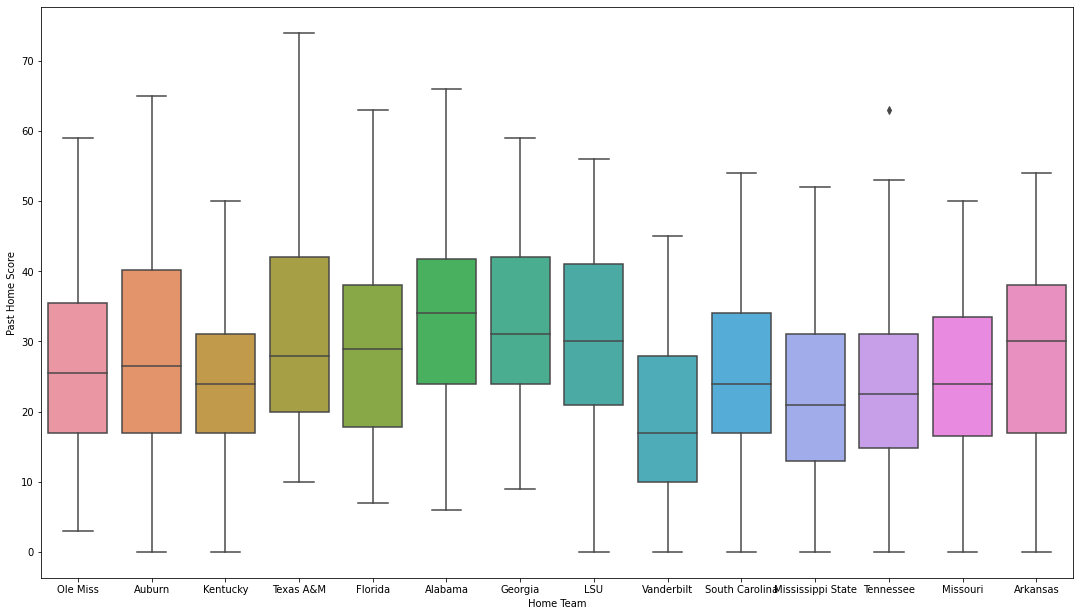

In [25]:
# Create box plot with Seaborn's default settings
sns.boxplot(x='Home Team',y='Past Home Score',data=df)

# Label the axes

plt.xlabel('Home Team')
plt.ylabel('Past Home Score')

# Show the plot
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)

plt.show()